In [32]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist, squareform, cdist
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import cosine_similarity

from tqdm import tqdm

In [4]:
DATA_DIR = '../../datasets/NNN/'
dat = pd.read_pickle(os.path.join(DATA_DIR, ('face_roi_data.pkl')))
print(f'Unique face ROIs: {list(dat['roi'].unique())}')

Unique face ROIs: ['Unknown_19_F', 'MF1_9_F', 'MF1_8_F', 'AF3_18_F', 'MF1_7_F', 'Unknown_5_F', 'AMC3_28_F']


In [83]:
ROI = 'MF1_9_F'
PVAL = 0.05
METRIC = 'correlation'

roi_dat = dat[(dat['roi']==ROI) & (dat['p_value']<PVAL)].reset_index(drop=True)
# units, time points, images
X = np.stack(roi_dat['img_psth']) 

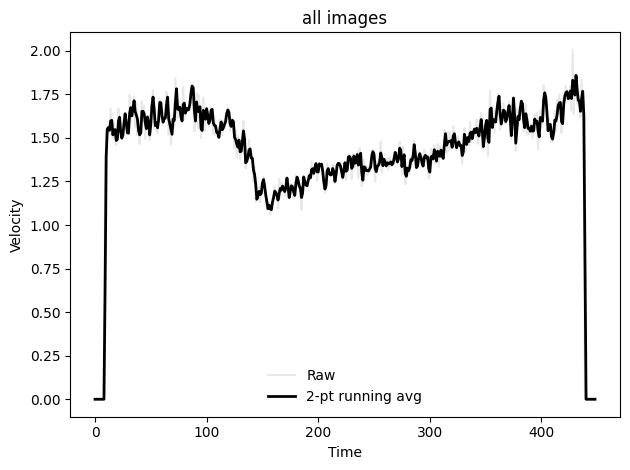

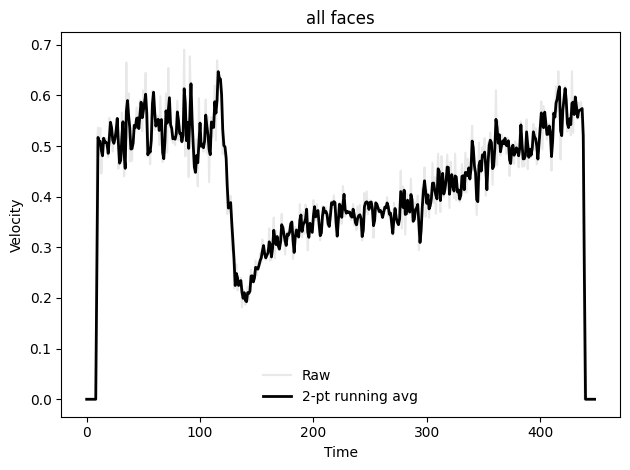

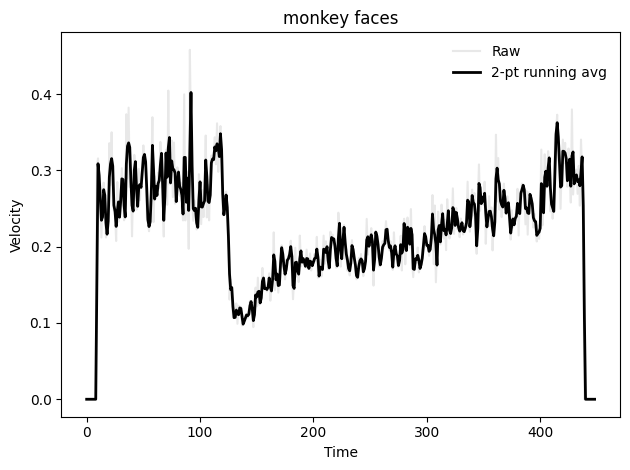

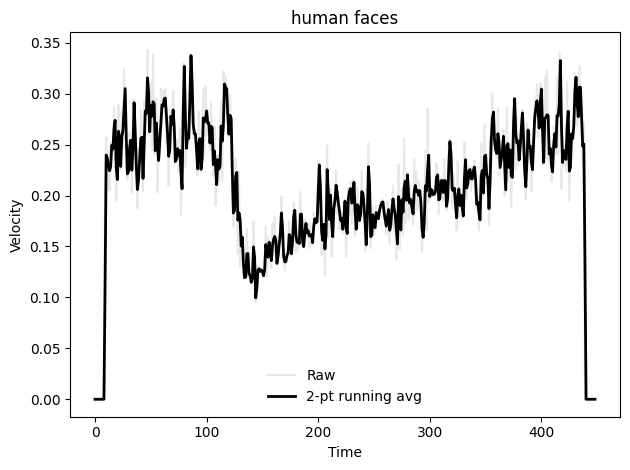

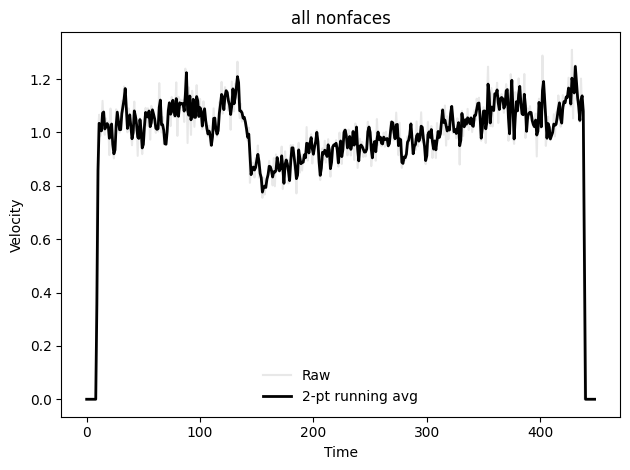

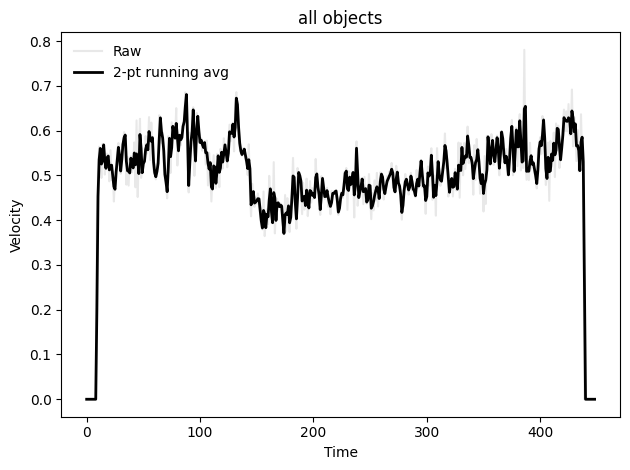

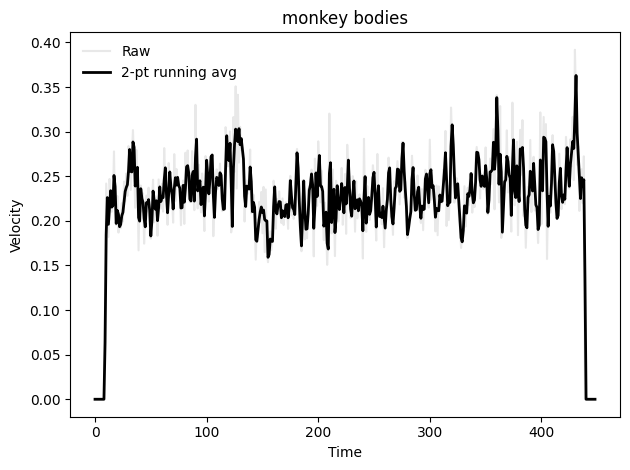

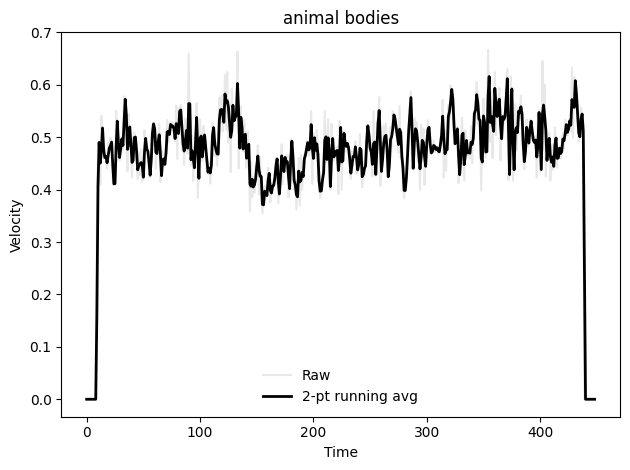

In [86]:
img_sets = {'all images': np.arange(1000,1072), 
           'all faces': np.arange(1000,1024),
           'monkey faces':  np.concatenate([np.arange(1000,1006), np.arange(1009,1016)]),
           'human faces': np.concatenate([np.arange(1006,1009), np.arange(1016,1025)]),
           'all nonfaces': np.arange(1025,1072),
            'all objects': np.setdiff1d(np.arange(1000, 1072), np.concatenate([np.arange(1000,1024), np.arange(1025,1031), np.arange(1043,1049), np.arange(1051,1062)])),
           'monkey bodies': np.concatenate([np.arange(1026,1031), np.arange(1043,1049)]),
            'animal bodies': np.concatenate([np.arange(1026,1031), np.arange(1043,1049), np.arange(1051,1062)]),
           }
# pairwise distances between consecutive timepoints
DISTANCE = "euclidean"

timepoints = np.arange(0, 450)
for label, idxs, in img_sets.items():
    img_resp = X[:, timepoints, :]
    img_resp = img_resp[:, :, idxs]
    vRDMs = []
    for t in range(img_resp.shape[1]):
        t_resp = img_resp[:, t, :]
        vRDM = pdist(t_resp.T, metric=METRIC)
        vRDMs.append(vRDM)
    vRDMs = np.array(vRDMs)
    vclean = np.nan_to_num(vRDMs)
    
    # true velocity
    vel_true = np.array([
        cdist(vclean[t:t+1], vclean[t+1:t+2], metric=DISTANCE)[0, 0]
        for t in range(vclean.shape[0]-1)
    ])
    
    # shuffled (permute time indices)
    shuff_idx = np.random.permutation(vclean.shape[0])
    vshuff = vclean[shuff_idx]
    vel_shuff = np.array([
        cdist(vshuff[t:t+1], vshuff[t+1:t+2], metric=DISTANCE)[0, 0]
        for t in range(vshuff.shape[0]-1)
    ])

    win = 2  # smoothing window size
    kernel = np.ones(win) / win
    vel_smooth = np.convolve(vel_true, kernel, mode='same')
    
    fig,ax = plt.subplots(1,1)
    
    ax.plot(vel_true, color='lightgray', label='Raw', alpha=0.5)
    ax.plot(vel_smooth, color='black', linewidth=2, label=f'{win}-pt running avg')
    # ax.axhline(y=np.mean(vel_shuff), color='red')
    ax.set_title(f'{label}')
    
    plt.xlabel("Time")
    plt.ylabel("Velocity")
    plt.legend(frameon=False)
    plt.tight_layout()
    plt.show()

In [ ]:
img_sets = {'all images': np.arange(1000,1072), 
           'all faces': np.arange(1000,1024),
           'monkey faces':  np.concatenate([np.arange(1000,1006), np.arange(1009,1016)]),
           'human faces': np.concatenate([np.arange(1006,1009), np.arange(1016,1025)]),
           'all nonfaces': np.arange(1025,1072),
            'all objects': np.setdiff1d(np.arange(1000, 1072), np.concatenate([np.arange(1000,1024), np.arange(1025,1031), np.arange(1043,1049), np.arange(1051,1062)])),
           'monkey bodies': np.concatenate([np.arange(1026,1031), np.arange(1043,1049)]),
            'animal bodies': np.concatenate([np.arange(1026,1031), np.arange(1043,1049), np.arange(1051,1062)]),
           }
# pairwise distances between consecutive timepoints
DISTANCE = "cosine"

timepoints = np.arange(0, 450)
for label, idxs, in img_sets.items():
    img_resp = X[:, timepoints, :]
    img_resp = img_resp[:, :, idxs]
    vRDMs = []
    for t in range(img_resp.shape[1]):
        t_resp = img_resp[:, t, :]
        vRDM = pdist(t_resp, metric=METRIC)
        vRDMs.append(vRDM)
    vRDMs = np.array(vRDMs)
    vclean = np.nan_to_num(vRDMs)
    
    # true velocity
    vel_true = np.array([
        cdist(vclean[t:t+1], vclean[t+1:t+2], metric=DISTANCE)[0, 0]
        for t in range(vclean.shape[0]-1)
    ])
    
    # shuffled (permute time indices)
    shuff_idx = np.random.permutation(vclean.shape[0])
    vshuff = vclean[shuff_idx]
    vel_shuff = np.array([
        cdist(vshuff[t:t+1], vshuff[t+1:t+2], metric=DISTANCE)[0, 0]
        for t in range(vshuff.shape[0]-1)
    ])

    win = 2  # smoothing window size
    kernel = np.ones(win) / win
    vel_smooth = np.convolve(vel_true, kernel, mode='same')
    
    fig,ax = plt.subplots(1,1)
    
    ax.plot(vel_true, color='lightgray', label='Raw', alpha=0.5)
    ax.plot(vel_smooth, color='black', linewidth=2, label=f'{win}-pt running avg')
    ax.axhline(y=np.mean(vel_shuff), color='red')
    ax.set_title(f'{label}')
    
    plt.xlabel("Time")
    plt.ylabel("Velocity")
    plt.legend(frameon=False)
    plt.tight_layout()
    plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 147.18it/s]


Mean true velocity: 0.0176
Mean shuff velocity: 0.6889

Difference:-0.6714
Permutation p-value (greater-than): 1


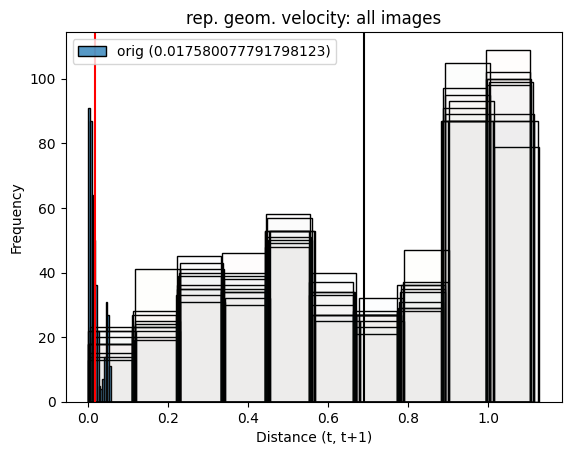

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 317.40it/s]


Mean true velocity: 0.0206
Mean shuff velocity: 0.7769

Difference:-0.7562
Permutation p-value (greater-than): 1


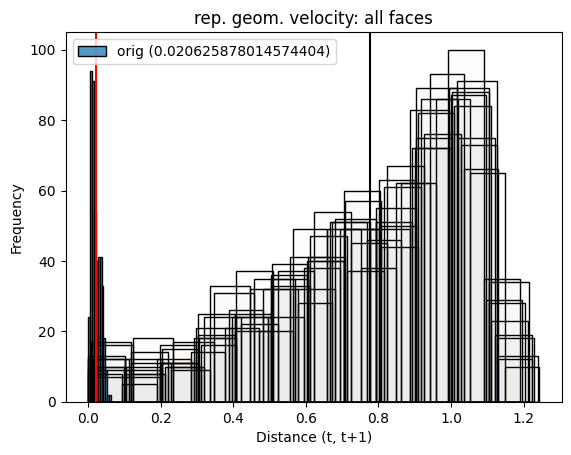

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 352.57it/s]


Mean true velocity: 0.0213
Mean shuff velocity: 0.7988

Difference:-0.7774
Permutation p-value (greater-than): 1


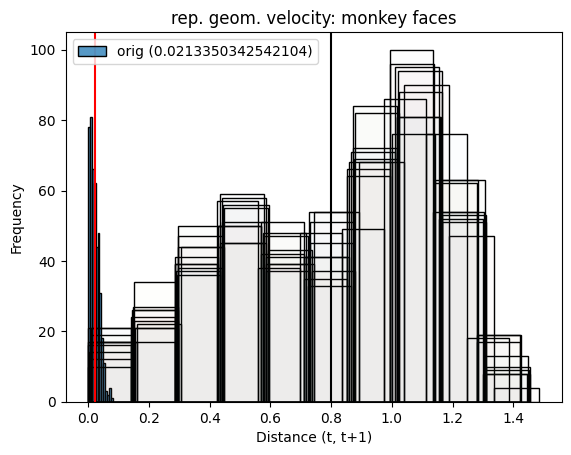

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 356.96it/s]


Mean true velocity: 0.0144
Mean shuff velocity: 0.5757

Difference:-0.5613
Permutation p-value (greater-than): 1


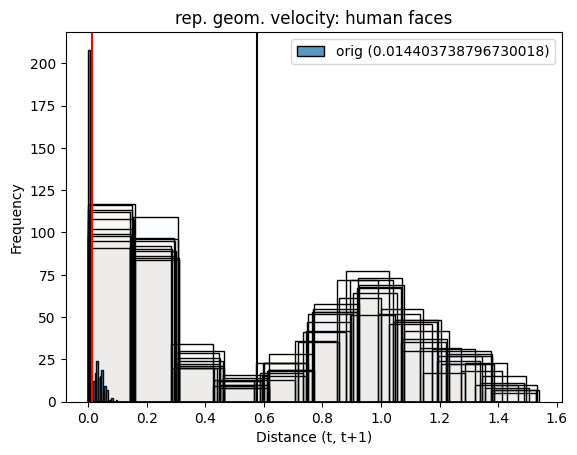

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 229.11it/s]


Mean true velocity: 0.0232
Mean shuff velocity: 0.8052

Difference:-0.7821
Permutation p-value (greater-than): 1


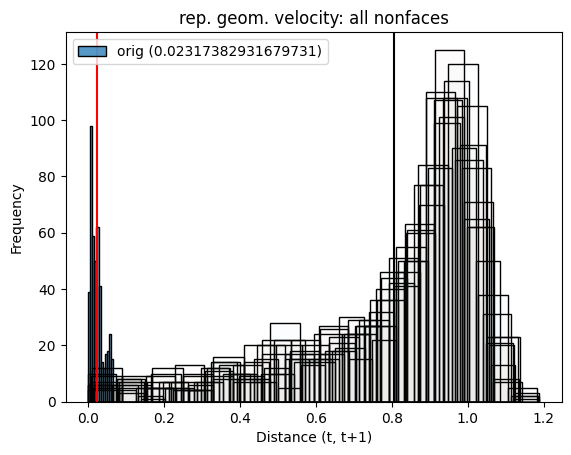

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 317.26it/s]


Mean true velocity: 0.0230
Mean shuff velocity: 0.7998

Difference:-0.7768
Permutation p-value (greater-than): 1


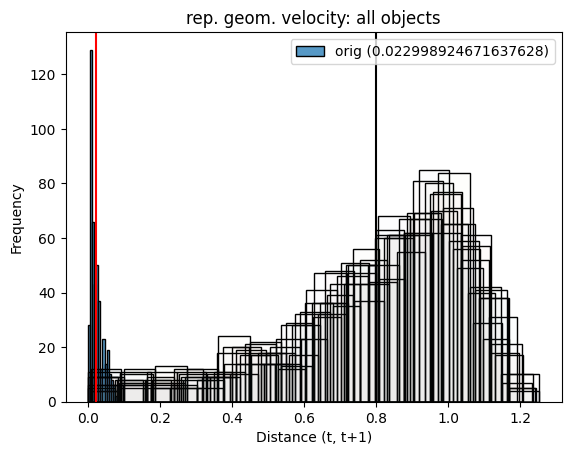

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 353.03it/s]


Mean true velocity: 0.0198
Mean shuff velocity: 0.7744

Difference:-0.7546
Permutation p-value (greater-than): 1


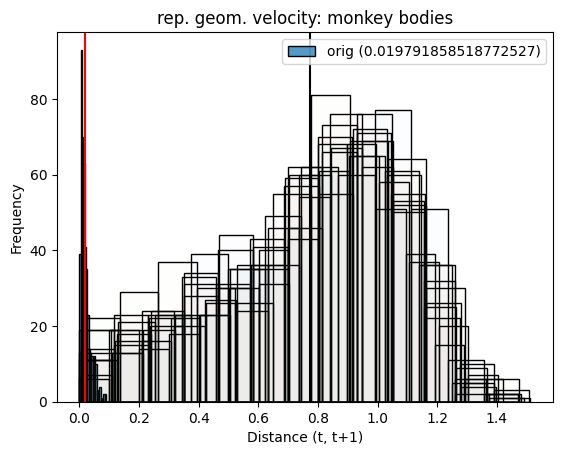

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 334.67it/s]


Mean true velocity: 0.0224
Mean shuff velocity: 0.7883

Difference:-0.7659
Permutation p-value (greater-than): 1


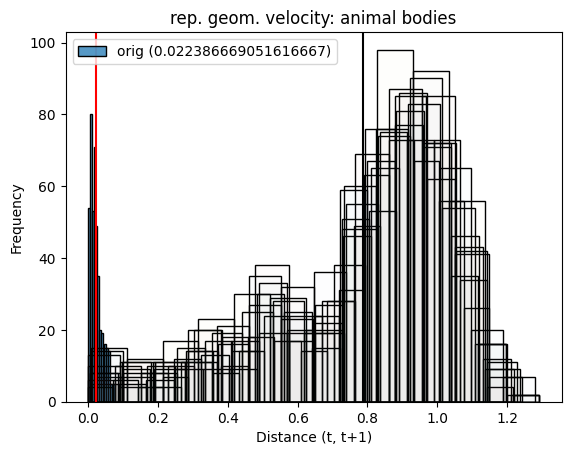

In [81]:
img_sets = {'all images': np.arange(1000,1072), 
           'all faces': np.arange(1000,1024),
           'monkey faces':  np.concatenate([np.arange(1000,1006), np.arange(1009,1016)]),
           'human faces': np.concatenate([np.arange(1006,1009), np.arange(1016,1025)]),
           'all nonfaces': np.arange(1025,1072),
            'all objects': np.setdiff1d(np.arange(1000, 1072), np.concatenate([np.arange(1000,1024), np.arange(1025,1031), np.arange(1043,1049), np.arange(1051,1062)])),
           'monkey bodies': np.concatenate([np.arange(1026,1031), np.arange(1043,1049)]),
            'animal bodies': np.concatenate([np.arange(1026,1031), np.arange(1043,1049), np.arange(1051,1062)]),
           }
# pairwise distances between consecutive timepoints
DISTANCE = "correlation"

def velocity(X, metric="euclidean"):
    return np.array([cdist(X[t:t+1], X[t+1:t+2], metric=metric)[0,0]
                     for t in range(X.shape[0]-1)])

for label, idxs, in img_sets.items():
    img_resp = X[:, :, idxs]
    vRDMs = []
    for t in range(img_resp.shape[1]):
        t_resp = img_resp[:, t, :]
        vRDM = pdist(t_resp.T, metric=METRIC)
        vRDMs.append(vRDM)
    vRDMs = np.array(vRDMs)
    vclean = np.nan_to_num(vRDMs)
    
   # true velocity
    vel_true = velocity(vclean, metric=DISTANCE)
    
    # permutation (chance) — shuffle time, repeat, and average
    rng = np.random.default_rng(0)
    n_shuffle = 100
    vel_shuffs = np.empty((n_shuffle, vel_true.size))
    for s in tqdm(range(n_shuffle)):
        vshuff = vclean[rng.permutation(vclean.shape[0])]
        vel_shuffs[s] = velocity(vshuff, metric=DISTANCE)
    
    # per-time null mean/CI and global test on mean velocity
    null_mean = vel_shuffs.mean(axis=0)
    null_lo   = np.percentile(vel_shuffs, 2.5, axis=0)
    null_hi   = np.percentile(vel_shuffs, 97.5, axis=0)
    
    true_mean = vel_true.mean()
    null_mean_dist = vel_shuffs.mean(axis=1)
    null_med = np.median(null_mean_dist)
    pval = (np.sum(null_mean_dist >= true_mean) + 1) / (n_shuffle + 1)
    
    diff = true_mean - null_med
    print(f"Mean true velocity: {true_mean:.4f}\nMean shuff velocity: {null_med:.4f}\n\nDifference:{diff:.4f}")
    print(f"Permutation p-value (greater-than): {pval:.4g}")

    fig, ax = plt.subplots(1,1)
    sns.histplot(vel_true, ax=ax, label=f'orig ({true_mean})')
    ax.axvline(x=np.mean(vel_true), color='red')
    for i in range(10):
        sns.histplot(vel_shuffs[i], alpha=0.01, ax=ax)
    ax.axvline(x=null_med, color='black')
    
    plt.legend()
    plt.xlabel("Distance (t, t+1)")
    plt.ylabel("Frequency")
    ax.set_title(f'rep. geom. velocity: {label}')
    plt.show()